In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [43]:
usecols = [i for i in range(0,13)] + [14]
data = pd.read_csv('wazedata_clean.csv', sep = ',',
                   encoding = 'utf8', header=None, low_memory=False, usecols=usecols)

# print(len(data))
          
data.columns = ['inject_date', 'street', 'city', 'country', 
                'delay', 'endNode', 'Length', 'level', 'pubMillis', 'roadType', 'speed', 'uuid',
                'startTime', 'endTime']

# Convertir columna fecha en tipo fecha formato UTC
data['startTime'] = [datetime.strptime(d, '%m/%d/%Y %I:%M:%S %p') for d in data['startTime']]
data['endTime'] = [datetime.strptime(d, '%m/%d/%Y %I:%M:%S %p') for d in data['endTime']]

                       0                 1               2   3    4   \
0  02/28/2015 12:50:00 PM  Commonwealth Ave      Boston, MA  US   84   
1  02/28/2015 12:50:00 PM       Boylston St      Boston, MA  US   70   
2  02/28/2015 12:50:00 PM       Congress St      Boston, MA  US   89   
3  02/28/2015 12:50:00 PM  Commonwealth Ave      Newton, MA  US  112   
4  02/28/2015 12:50:00 PM     Washington St  Somerville, MA  US   96   

               5    6   7             8   9         10  \
0     Harvard Ave  630   3  1.430000e+12   6  4.216781   
1       Dalton St  434   3  1.430000e+12   6  2.921210   
2            D St  479   3  1.430000e+12   7  2.919852   
3      College Rd  448   3  1.430000e+12   6  3.085658   
4  Somerville Ave  773   2  1.430000e+12   7  4.303328   

                                     11                      12  \
0  7fdf1b0c-ca41-342d-8e44-80e352800088  02/28/2015 12:43:00 PM   
1  a46a0393-bada-3186-bcab-b1b92404da88  02/28/2015 12:43:00 PM   
2  a8177ede-1125-

In [44]:
ndate=data.groupby('startTime')  # Agrupa por fecha y contabiliza
newdate=pd.DataFrame(ndate.size().reset_index(name = "Group_Count")) # Crea dataframe a partir del resultado del groupby
newdate.head()

,startTime,Group_Count
0,2015-02-23 00:05:00,94
1,2015-02-23 00:15:00,98
2,2015-02-23 00:26:00,93
3,2015-02-23 00:35:00,84
4,2015-02-23 00:46:00,91


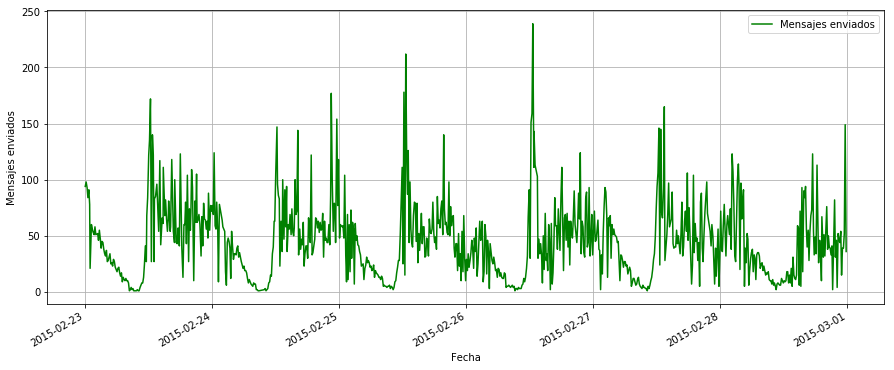

In [46]:
plt.figure()
tsdate = newdate.set_index('startTime')
tsdate.plot(figsize=(15, 6), color='g')
plt.ylabel('Mensajes enviados')
plt.xlabel('Fecha')
plt.legend(['Mensajes enviados'], loc=1)
plt.grid()
plt.show()

In [47]:
data['startHourTime'] = [d.time() for d in data['startTime']]
data.head()

,inject_date,street,city,country,delay,endNode,Length,level,pubMillis,roadType,speed,uuid,startTime,endTime,startHourTime
0,02/28/2015 12:50:00 PM,Commonwealth Ave,"Boston, MA",US,84,Harvard Ave,630,3,1.430000e+12,6,4.216781,7fdf1b0c-ca41-342d-8e44-80e352800088,2015-02-28 12:43:00,2015-02-28 12:44:00,12:43:00
1,02/28/2015 12:50:00 PM,Boylston St,"Boston, MA",US,70,Dalton St,434,3,1.430000e+12,6,2.921210,a46a0393-bada-3186-bcab-b1b92404da88,2015-02-28 12:43:00,2015-02-28 12:44:00,12:43:00
2,02/28/2015 12:50:00 PM,Congress St,"Boston, MA",US,89,D St,479,3,1.430000e+12,7,2.919852,a8177ede-1125-3a5c-adec-0c7af83bc469,2015-02-28 12:43:00,2015-02-28 12:44:00,12:43:00
3,02/28/2015 12:50:00 PM,Commonwealth Ave,"Newton, MA",US,112,College Rd,448,3,1.430000e+12,6,3.085658,9358c2e3-794a-3c4f-b13b-909c2b7f8b05,2015-02-28 12:43:00,2015-02-28 12:44:00,12:43:00
4,02/28/2015 12:50:00 PM,Washington St,"Somerville, MA",US,96,Somerville Ave,773,2,1.430000e+12,7,4.303328,8fa64425-4eac-33cc-84eb-20085a3759b1,2015-02-28 12:43:00,2015-02-28 12:44:00,12:43:00


In [48]:
ntime = data.groupby(by=[data.startHourTime.map(lambda x : (x.hour))]) # Agrupa por hora
n2time=pd.DataFrame(ntime.size().reset_index(name = "Mensajes enviados")) # Convierte en dataframe
newtime = n2time.set_index('startHourTime')

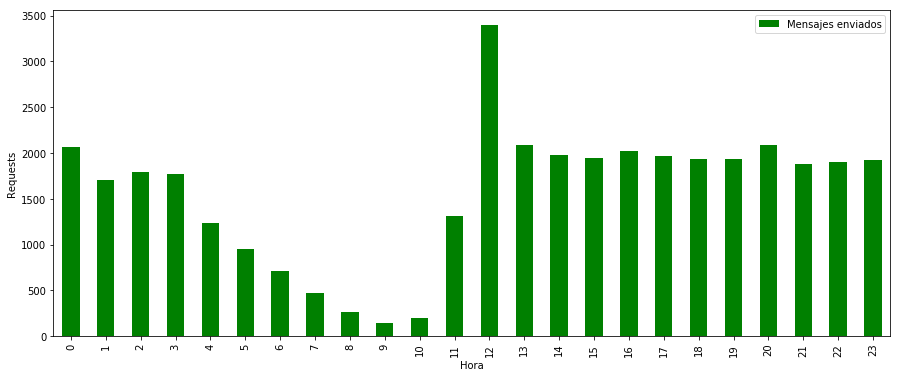

In [49]:
newtimep = newtime[['Mensajes enviados']].plot(kind='bar', figsize=(15, 6), color='g')
newtimep.set_xlabel("Hora")
newtimep.set_ylabel("Requests")
plt.show()

### Places

In [58]:
place_nodes=data.groupby('endNode', sort=True)  # Agrupa por fecha y contabiliza
places_frame=pd.DataFrame(place_nodes.size().reset_index(name = "Group_Places")) # Crea dataframe a partir del resultado del groupby
places_frame.sort_values('Group_Places', ascending=False).head()


,endNode,Group_Places
1210,Washington St,2087
736,Massachusetts Ave,935
118,Blue Hill Ave,908
336,Dorchester Ave,745
1134,Tremont St,741


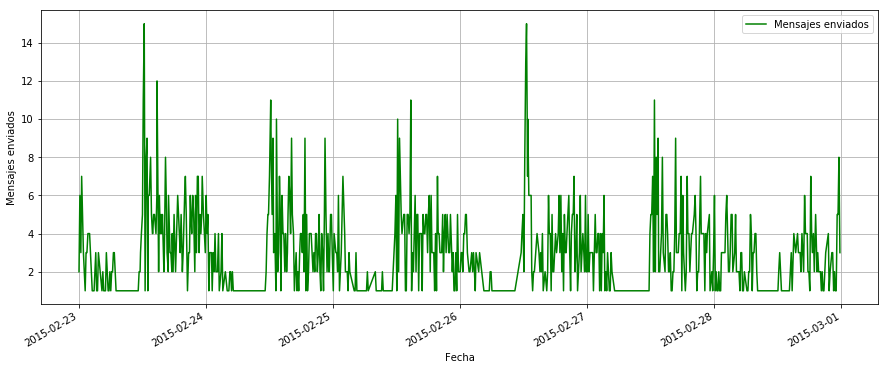

In [62]:
placew = data[data['endNode'] == "Washington St"]

ndate=placew.groupby('startTime')  # Agrupa por fecha y contabiliza
newdate=pd.DataFrame(ndate.size().reset_index(name = "Group_Count")) # Crea dataframe a partir del resultado del groupby
newdate.head()

plt.figure()
tsdate = newdate.set_index('startTime')
tsdate.plot(figsize=(15, 6), color='g')
plt.ylabel('Mensajes enviados')
plt.xlabel('Fecha')
plt.legend(['Mensajes enviados'], loc=1)
plt.grid()
plt.show()


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


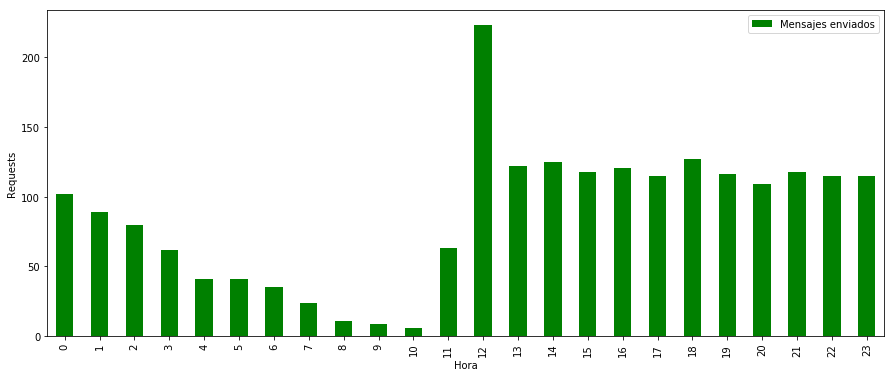

In [63]:
placew['startHourTime'] = [d.time() for d in placew['startTime']]
placew.head()

ntime = placew.groupby(by=[placew.startHourTime.map(lambda x : (x.hour))]) # Agrupa por hora
n2time=pd.DataFrame(ntime.size().reset_index(name = "Mensajes enviados")) # Convierte en dataframe
newtime = n2time.set_index('startHourTime')

newtimep = newtime[['Mensajes enviados']].plot(kind='bar', figsize=(15, 6), color='g')
newtimep.set_xlabel("Hora")
newtimep.set_ylabel("Requests")
plt.show()